# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline
import matplotlib.pyplot as plt
# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
    display(data.describe())
    display(data.head())
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


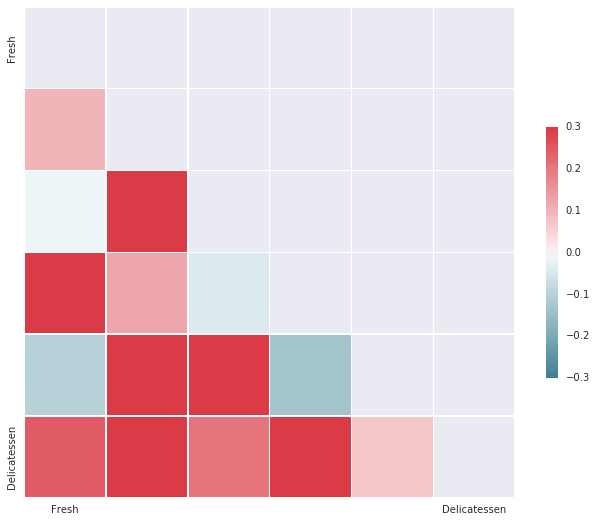

In [2]:
# Display a description of the dataset
display(data.describe())
corr = data.corr()
display(corr)
import seaborn as sns
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [67, 32, 340]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

display(samples - data.mean().round())
display(samples - data.median().round())

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,19913,6759,13462,1256,5141,834
1,21632,1318,2886,266,918,405
2,381,4025,9670,388,7271,1371


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7913.0,963.0,5511.0,-1816.0,2260.0,-691.0
1,9632.0,-4478.0,-5065.0,-2806.0,-1963.0,-1120.0
2,-11619.0,-1771.0,1719.0,-2684.0,4390.0,-154.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,11409.0,3132.0,8706.0,-270.0,4325.0,-132.0
1,13128.0,-2309.0,-1870.0,-1260.0,102.0,-561.0
2,-8123.0,398.0,4914.0,-1138.0,6455.0,405.0


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:** 
The first customer seems to be buying a lot of fresh, milk, grocery and frozen foods. Detergent paper also seems to be pretty high. It buyers relatively lower amount of frozen, and deli items. 
7913 more than the mean for fresh, 5511 more for groceries. as well as 2260 more of detergent paper
From this, it seems like it is likely to be a restaurant catering to local population (and probably a veg restaurant)

The second option has a lot of fresh products (9632 more than the mean), but is low on all other attributes. It seems to be a fresh supermarket or a vegetable vendor. 

The third customer has predominantly a lot of detergent paper (4390 more than the mean) and grocery (1719 more than mean). It is very low on frozen(11619 below mean). Seems to be a fresh food restaurant with these attributes

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Grocery', axis=1)
new_label = data['Grocery']
#display(data.describe())
#display(new_data.describe())
# TODO: Split the data into training and testing sets using the given feature as the target

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     new_data, new_label, test_size=len(new_label)/4, random_state=42)
print len(new_label)
# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=23)
regressor.fit(X_train, y_train)
# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print score

440
0.683458382537


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** I was aiming to predict the Grocery score basis all the other parameters. The r^2 for the same came to .68. While this is not a bad score, it is a reaonable one. Basically, it says that 68% of the value of Grocery can be predicted basis the other columns. It is reasonable, but not great or terrible, nad it may not be a bad idea to consider the same for removal. 

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

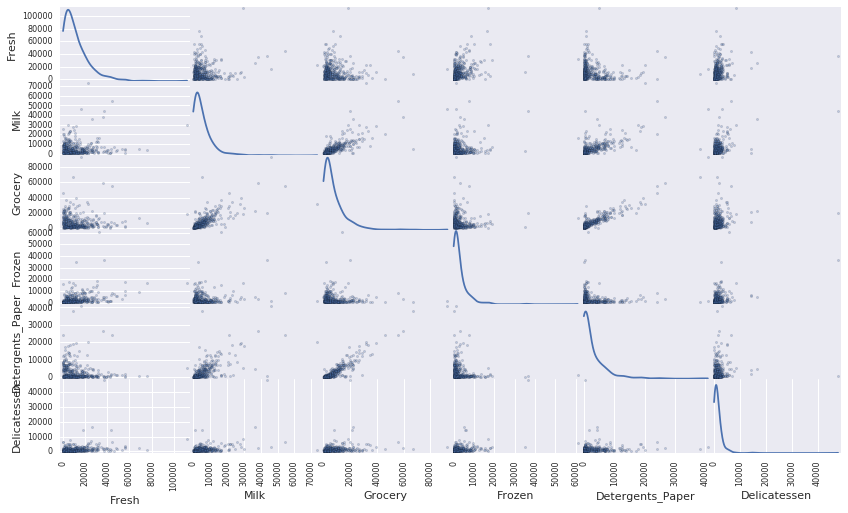

the hist for grocery


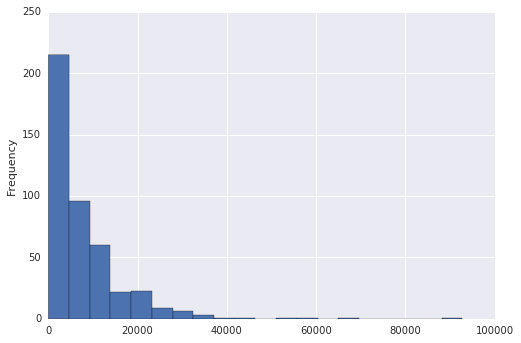

the hist for milk


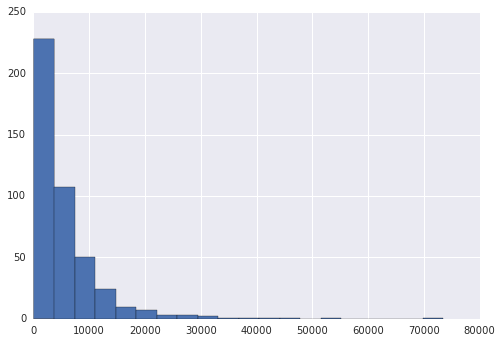

this hist for Frozen


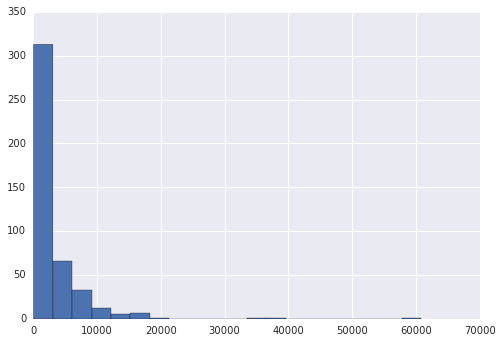

this hist for Detergent Paper


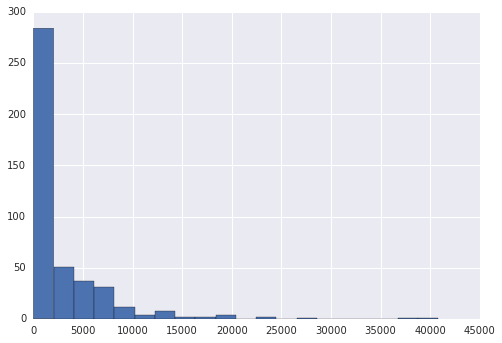

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [5]:
# Produce a scatter matrix for each pair of features in the data
from pandas.tools.plotting import bootstrap_plot
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
plt.show()
print "the hist for grocery"
data['Grocery'].plot.hist(bins=20)
plt.show()
print "the hist for milk"
data['Milk'].hist(bins=20)
plt.show()
print "this hist for Frozen"
data['Frozen'].hist(bins=20)
plt.show()
print "this hist for Detergent Paper"
data['Detergents_Paper'].hist(bins=20)
plt.show()
display(data.corr())

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** There are a fair bit of feature combinations which show a good deal of correlation just by looking at the scatter plots. E.g. Gtocery, which we had selected correlates strongly with Detergent paper, as well as Milk (to a slightly lower extent). Milk also correlates reasonably well with Detergent paper. 
Coming back to the eearlier suspicions that we had in question 2, it does validate them. Grocery does in fact correlate with a couple of attributes and can be removed on account of duplication, since Detergent paper itself may explain the variance that we would have otherwise got from grceries

ALso, if we really look at the data , there is a very strong right skew. that is on account of 2 reasons
1. Strong set of outliars, which pushes the bins to be more than they really should
2. it anyway even after than is clustered strongly. We woud addres that by taking a log scale of the items to normalize

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

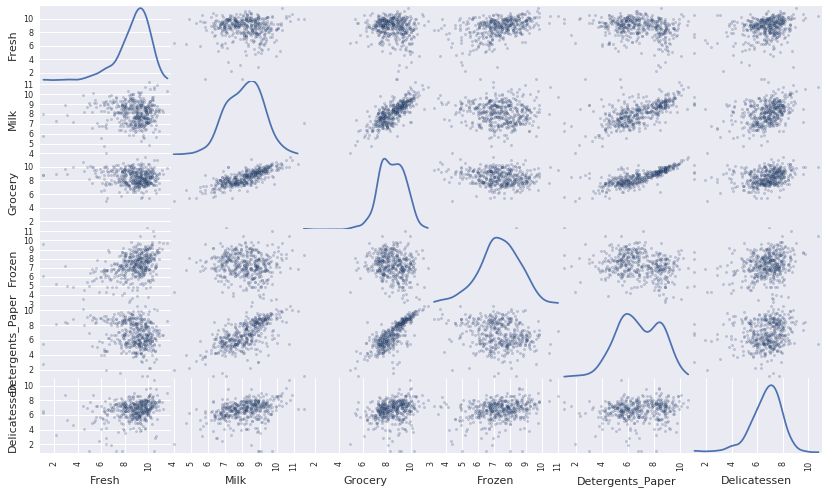

the hist for grocery


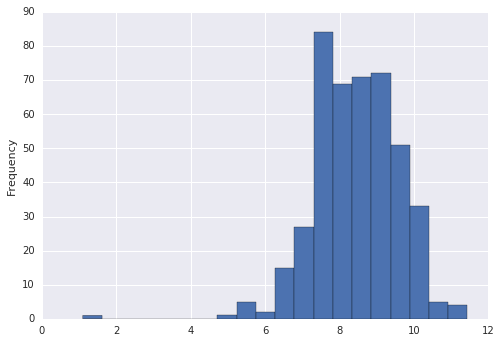

the hist for milk


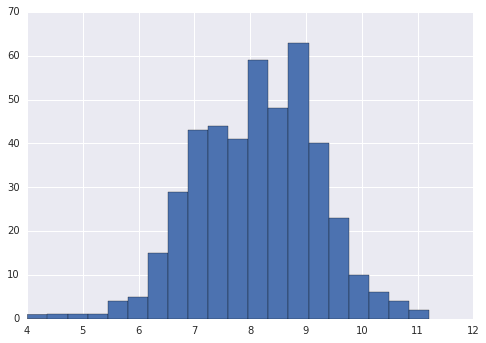

this hist for Frozen


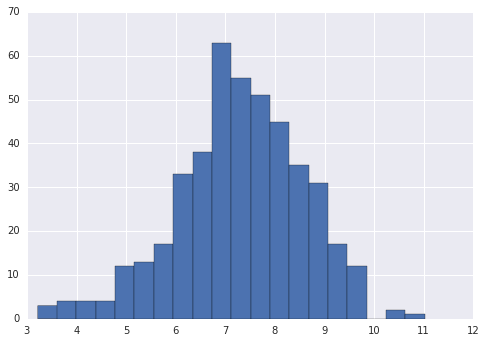

this hist for Detergent Paper


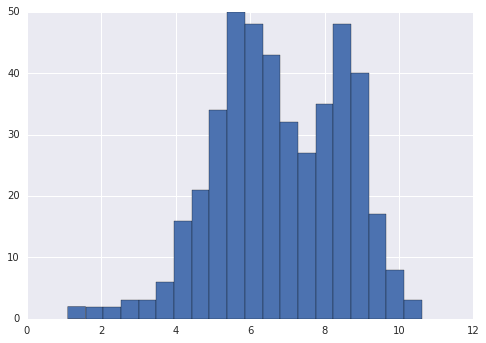

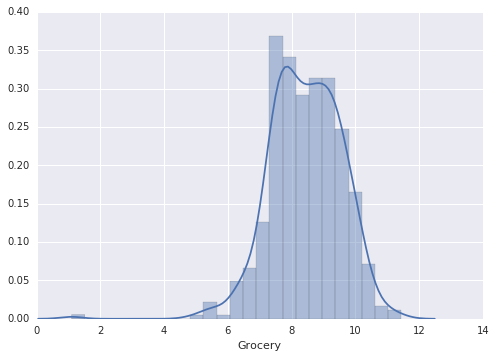

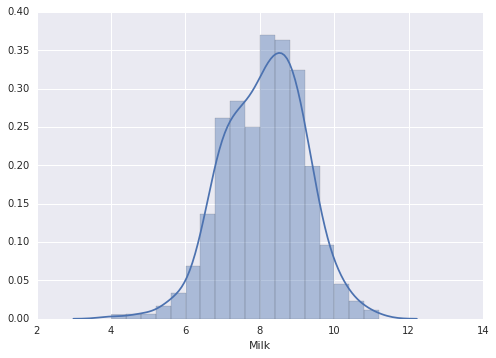

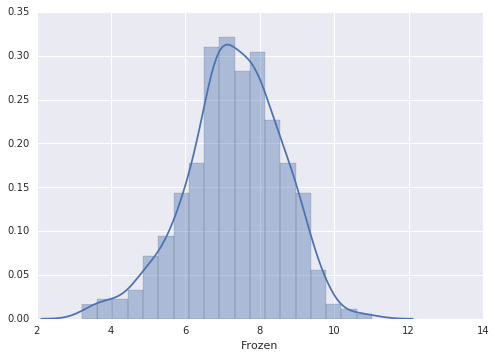

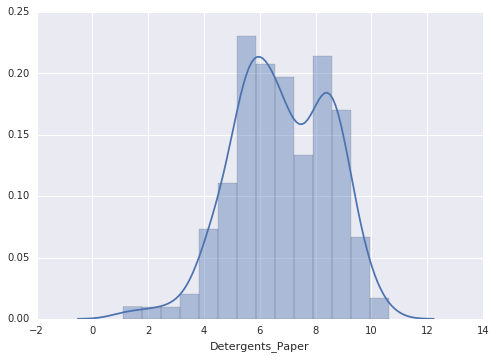

In [6]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)
# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
plt.show()
print "the hist for grocery"
log_data['Grocery'].plot.hist(bins=20)
plt.show()
print "the hist for milk"
log_data['Milk'].hist(bins=20)
plt.show()
print "this hist for Frozen"
log_data['Frozen'].hist(bins=20)
plt.show()
print "this hist for Detergent Paper"
log_data['Detergents_Paper'].hist(bins=20)

plt.show()
sns.set(color_codes=True)
sns.distplot(log_data['Grocery']);

plt.show()
sns.set(color_codes=True)
sns.distplot(log_data['Milk']);

plt.show()
sns.set(color_codes=True)
sns.distplot(log_data['Frozen']);

plt.show()
sns.set(color_codes=True)
sns.distplot(log_data['Detergents_Paper']);
plt.show()


### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [7]:
# Display the log-transformed sample data
display(log_samples)

logcorr = log_data.corr()
display(logcorr)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.899128,8.818630,9.507626,7.135687,8.545003,6.726233
1,9.981929,7.183871,7.967627,5.583496,6.822197,6.003887
2,5.942799,8.300280,9.176784,5.961005,8.891649,7.223296


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,-0.019834,-0.132713,0.383996,-0.155871,0.255186
Milk,-0.019834,1.000000,0.758851,-0.055316,0.677942,0.337833
Grocery,-0.132713,0.758851,1.000000,-0.164524,0.796398,0.235728
Frozen,0.383996,-0.055316,-0.164524,1.000000,-0.211576,0.254718
Detergents_Paper,-0.155871,0.677942,0.796398,-0.211576,1.000000,0.166735
Delicatessen,0.255186,0.337833,0.235728,0.254718,0.166735,1.000000


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

Fresh
Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Milk
Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Grocery
Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Frozen
Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Detergents_Paper
Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Delicatessen
Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


These are the outliers occuring 2 or more times
[128, 65, 66, 75, 154]
removing '42'
[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412, 86, 98, 154, 356, 75, 154, 38, 57, 65, 145, 175, 264, 325, 420, 429, 439, 75, 161, 66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]
398
the hist for grocery


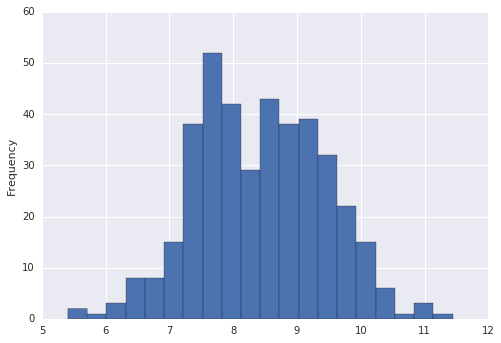

the hist for milk


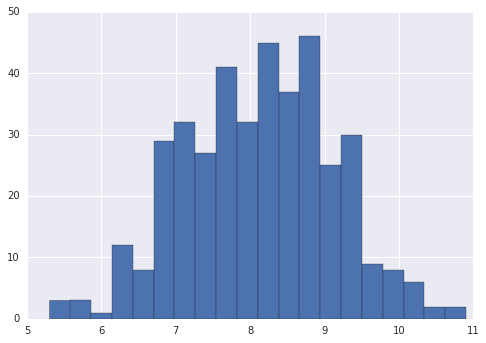

this hist for Frozen


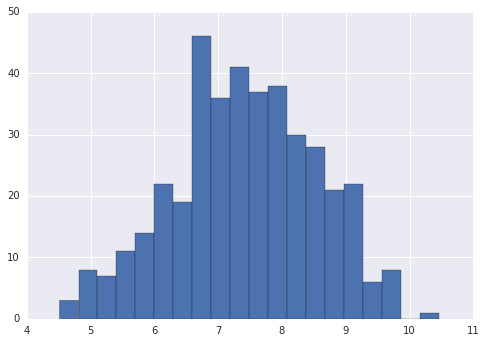

this hist for Detergent Paper


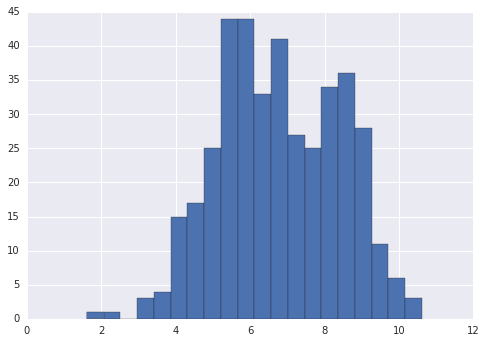

In [8]:
allout = []
# For each feature find the data points with extreme high or low values
good_data = log_data
for feature in log_data.keys():
    print feature
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    rem = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]

    # OPTIONAL: Select the indices for data points you wish to remove
    outliers  = rem.index.tolist()
    allout.extend(outliers)

outliers = list(set([x for x in allout if allout.count(x) >1]))
print "These are the outliers occuring 2 or more times"
print outliers

#set is used in order to remove duplicates from the list in allout
print "removing '{}'".format(len(set(allout)))
print allout
    
# Remove the outliers, if any were specified
good_data = good_data.drop(log_data.index[allout]).reset_index(drop = True)
    
print len(good_data)
plt.show()
print "the hist for grocery"
good_data['Grocery'].plot.hist(bins=20)
plt.show()
print "the hist for milk"
good_data['Milk'].hist(bins=20)
plt.show()
print "this hist for Frozen"
good_data['Frozen'].hist(bins=20)
plt.show()
print "this hist for Detergent Paper"
good_data['Detergents_Paper'].hist(bins=20)
plt.show()
#current_palette = sns.color_palette()
#sns.palplot(sns.hls_palette(9, l=.3, s=.8))
#sns.distplot(log_data);
#plt.show()

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** Yes, there seem to be 42 points which were outliers. We started with the original set of 440, and left ended up with 398. The reason that we believe they were outliers, is because very exceptionally standout data can significantly alter standatd metric like the mean, and result in skewing the data. 

Outliers for 2 or more attributes, are lesser in number. these are just 5. As can be see from the output, the 5 items where the outliers exceed the 1.5 threshold for more than 2 attribute are 
[128, 65, 66, 75, 154]

When we looked at the original graphs of the distribution across various dimentions earlier, we did see that in all the cases, most clumnps were clusterd towards the bottom left (in the non-log version). in the log version, it did correct out a reasonable bit - but still existed to a certain extent

Therefore, we did remove outliwers that were 1.5 times or more of the interquartile range. As we can see from the distribution post log and outliar removal, they are a lot more centered, which makes a lot of sense to deal with - as compared to very strongly skewed data to drive any outcomes

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Explained variance ratio : [ 0.49930484  0.22594807  0.10488309  0.09781761  0.04879109  0.0232553 ]
Cumilative sum of variance is : [ 0.49930484  0.7252529   0.83013599  0.92795361  0.9767447   1.        ]


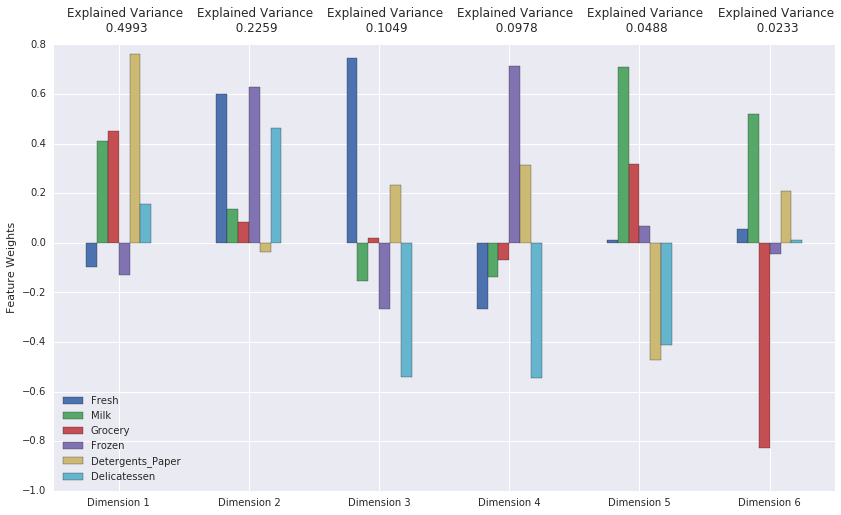

In [9]:


# TODO: Transform the good data using the PCA fit above
#reduced_data = pca.transform(good_data)

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=6) 

pca.fit(good_data)
print 'Explained variance ratio : {}'.format(pca.explained_variance_ratio_)
#print 'Cumilative Var :' . pca_results['Explained Variance'].cumsum()
# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)
print 'Cumilative sum of variance is : {}'.format(np.cumsum(pca.explained_variance_ratio_))

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:** The first 2 components that has been extracted by the algorithm explain close to  72.52%. If we add 4 principal components, we get close to 92.795361% . Which is a very strong explanation of the underlying data. 

The first dimention is strongly comprises of underlying explanation of milk, grocery and detergent paper. This sortof maps with the correlation that we had seen earlier among these 3 attributes, therefore explaining that phoenomenon. 
IF we try to think about the kind of segments that would have this consumption pattern - it seems to be a hotel/restaurant - where they are not just selling milk and groceries, but also cleaning up (detergent paper). therefore, it seems to make sense, and seems to be a logical grouping

The second component explains the other 3 attribtes, which are fresh, frozen and delicassant. Considering that the explanation of factor 2 is 22% (as against 49% for factor 1), that probably indicates that variance due to these factors is lower than the first 3. Thinking again regarding the kind of cousumer group, these seems to be establistents selling fresh, frozen and deli items. Seems logical for a fresh food supermarket. They arent having any detergent paper, so clearly,no cleaning taking place so not a hotel

Attribuets 3 seems to be making some strong tradeofs between fresh and delicassant, and also between detergent paper and frozen. From the look of it, delicassant has got overrepresented in the first 2 factors, and factor 3 and 4 aim to prune it down. This doesnt really seem to correspond to a customer group, as negative factors dont mean anything unless there are positive weights that a consumer segment has had earlier in process. Therefore, this attribute 3 definitely cannot be pegged to a consumer segment (like restaurant and supermarket) but more of a correction to the existing consumer segment once the earlier factors have been applied. 

Factor 4 aseems to do a similar correction between frozen and detergent paper (+) with Delicassant and fresh. Again, definitely cannot be a consumer segment by itself, but more of a correction to earlier segnet

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [10]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))


,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.0441,0.4827,1.1659,-0.0445,0.0300,-0.1080
1,-0.5541,-1.0705,1.8501,-0.9902,-0.6066,0.0311
2,2.5602,-2.5161,-1.5836,0.1064,-0.9346,-0.1856


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

[ 0.49930484  0.22594807]
[[ 2.04413122  0.48268851]
 [-0.55408167 -1.07045098]
 [ 2.56015826 -2.51605316]]


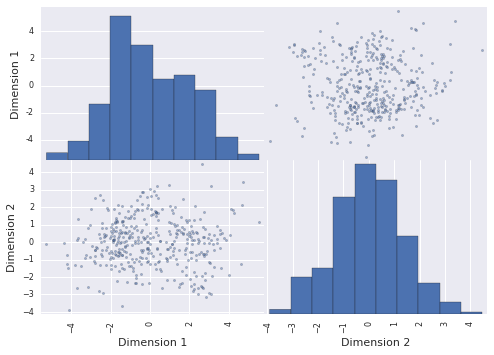

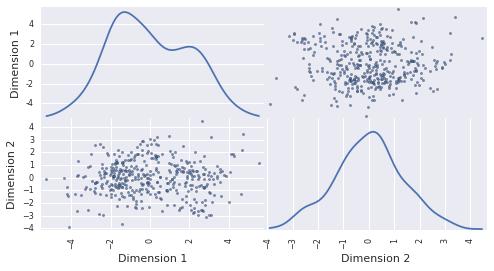

In [12]:
# TODO: Apply PCA by fitting the good data with only two dimensions
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(good_data)
print(pca.explained_variance_ratio_) 

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)
print pca_samples

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
pd.scatter_matrix(reduced_data)
plt.show()
pd.scatter_matrix(reduced_data, alpha = 0.8, figsize = (8,4), diagonal = 'kde');
plt.show()

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [13]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.0441,0.4827
1,-0.5541,-1.0705
2,2.5602,-2.5161


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:** K-Means is a simple clustering algorithm, which is fast and efficient, and normally pretty good at finding different buckets when they are clearly seperated. However, it is not consistant, the results often depend on where the scan starts, and it can result in an inefficient local optima in a lot of cases. 

The GMM clustering, or EM is on the other hand, a probability based clustering model, which doesnt cleanly bucket item into clusters, but instead gives them a probability around which cluster they are likely to belong to. It allows better / diffferent handling of conflicted points .However, it does tend to be quite slow since it does require probability calculation for the different points

In this case, we are looking for a fast unambiguous algo which would allow us to learly bucketise the items. The thing about EM is that when we use it, we need to know what to do with the grey areas. Shoudl we bucketize them? Should we ignore them? Should we mention that this needs more research. Unless we have a concrete forward actions to deal with abbiguous items (between 0.4 and 0.6 probability), we should use KM for clarity

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [14]:
from sklearn.cluster import KMeans
import numpy as np
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=2, random_state=0).fit(good_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(good_data)
from sklearn.metrics import silhouette_samples, silhouette_score
# TODO: Find the cluster centers
centers = clusterer.cluster_centers_
score = silhouette_score(good_data, preds)
print centers
print score

# TODO: Predict the cluster for each transformed sample data point
clusterer = KMeans(n_clusters=2, random_state=0).fit(reduced_data)

sample_preds = clusterer.predict(pca_samples)
print "these are the sample preds"
print "-------------------------"
print sample_preds
centers = clusterer.cluster_centers_
score = silhouette_score(reduced_data, preds)
# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
print centers
print score

[[ 8.65670766  8.93551503  9.35690527  6.97652851  8.39411131  7.03874862]
 [ 9.11753872  7.57954329  7.79443265  7.73037442  5.71868486  6.64314938]]
0.323070091233
these are the sample preds
-------------------------
[1 0 1]
[[-1.3899988   0.14110469]
 [ 2.11139058 -0.21433623]]
0.446510556644


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** On taking 2 clusters for the 2 dimensions, silhouette score came to .44. It goes down the .32 at  clusters- and it stays at that level for 6 as well as 8. 
Considering that the closer the silhouette coefficient is to 1 (as against -1), the better it is. Therefore, it seems like 2 clusters are likely to be the best option for our case

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

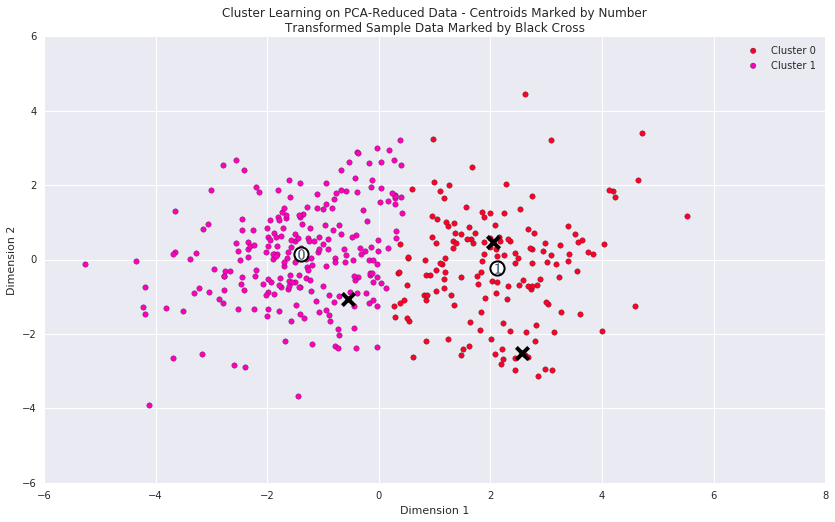

In [15]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [16]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

display(true_centers - data.mean())
#print "these are the 3 points extrapolated up"
#actual_samples = pd.DataFrame(np.exp(pca.inverse_transform(pca_samples)), columns = data.keys())
#display (actual_samples)

pca_samples2 = pd.DataFrame(reduced_data.loc[indices])
spct = 0
for s1 in pca_samples2.values:
    print "looking at sample {}".format(spct)
    spct = spct + 1
    centct = 0
    for center in centers:
        #print s1
        #print s1[0]
        #print center[0]
        #print s1[1]
        #print center[1]
        print "distance from point {}" . format(centct) 
        print np.sqrt(pow(s1[0] - center[0], 2)+ pow(s1[1] - center[1], 2))
        centct += 1
         
    print "-----"
#print "closeness to point 1"        
#display(pca_samples2-centers[0])
#print "closeness to point 2"        

#display(pca_samples2-centers[1])

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9451.0,1938.0,2449.0,2200.0,307.0,771.0
Segment 1,5424.0,7780.0,11532.0,1123.0,4444.0,1136.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-2549.297727,-3858.265909,-5502.277273,-871.931818,-2574.493182,-753.870455
Segment 1,-6576.297727,1983.734091,3580.722727,-1948.931818,1562.506818,-388.870455


looking at sample 0
distance from point 0
3.85660510637
distance from point 1
2.73614116954
-----
looking at sample 1
distance from point 0
1.47194584791
distance from point 1
2.79958475179
-----
looking at sample 2
distance from point 0
1.77145107872
distance from point 1
4.31825506878
-----


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:** 
In this case, segment 0 seem to represent a fresh food store. It is buying a lot of fresh items, as well as frozen goods. But is very low on all other parameters.It is buying a lore more Fresh (4027 units more), and significantly less of all other items (5842 of milk , 9083 units of grocery, 4137 units less of detergent paper). It buys a little more frozen items 1077 units more as well). All this seems to inicate to it being a fresh food supermarket

Segment 1 on the other hand is orderin all items, but significantly less than segment 1 of fresh and frozen items. Also very importantly it is buying a lot more detergent paper, which intutively indicates that they are doing in house cleaning from a qualitative perspective. That points to segment 1 being a resraurant

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [17]:
# Display the predictions]

for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:** Sample 0 was accurately predicted as per the hunch. In the beginning, we had suspected it to be a hotel with a restaurant. It finally did end up being a restaurant. Even if we look at the last distance from centroid score - sample 0 is closer to cluster 1 (distance of 2.73 vs 3.85)

Sample 1, we thought was a vegetable vendor. As per the cluster, it did enevtually to be a venegrable endor / fresh food store. Similarly, we look at the distance of this point from the centroid as well, it is closer to center 0 (1.47 vs 2.79)

Sample 2, we thought was a restaurant in our initial "gut feel". I terms of the distance comparisin though, it seems to be closer to the clsuter 0 center (1.77 vs 4.3). HOWEVER, for some off reason in the prediction, it has been bucketed to cluser 1. That seems odd. Would need to recheck that with the visualization. How does the distance score differ from the bucketization as well as the prediction

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** the customers who react positively to this, are essentially consumers who have a relatively high consumption of / high velosity of ordering certain inds of products. ooking at this data, the restaurant seems to be the one who has significantly higher order quantities (31439 units as against 17116). Considering that higher freuqnecies would directly impact the amount of staorage space that the restuarnat needs (space) as well as working capital (money), evey higher cycle would mean savings for the restaurnt. 

How would we run this A/B: 
- Firstly, we would pull out out restant and supermarket data into 2 buckets. One split would have data from the restaurant. The other split would have data from the supermarket
- For each of the above buckets, we would split the data again into 2 groups (E.g. GROUP_A_REST, GROUP_B_REST, GROUP_A_SUPER, and GROUP_B_SUPER)
- Basically we would need to run 2 A/B tests. one of GROUP_A_REST vs GROUP_B_REST and the other A/B test against GROUP_A_SUPER and GROUP_B_SUPER)
- we need to decide the proportions. Typcicaly you can easily do a 50-50% split of samples in both the A/B tests that we would like to run. However, in most cases - that is not really how it works. There already is an existing system, which is working (5 days a week), and you dont want to disrupy all users with the new test. In this case, you run a 90-10 or a 95-5% A/B .Which means 90% of users of that particlar segment (be it restaurant or supermarkets) would see the old approach (no impact) and 10% would see the new 5 day a week system. 
- Measurement - finally (actually the planning of this needs to be done right in the beginning), what is deemed to construct this to be a "success". I would resume this step is being done to improve customer satisfaction. Therefore it needs to track measurement of customer satisfaction of all A and B particpnats
- Finally cost vs improvement analysis. This may result in 1 10% improvement in CSAT, but 12% more cost. There needs to be a $ value assigned to CSAT to really be able to make the final tradeoff decision

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** The target variable would be the customer segment (Retailer, Cafe etc). We would use ordering data to identify what the customer segment classification of the data would be. 
E.g. users who have a spending on a partifular kind of items (Detergent paper) more likely to be hotels etc. That is the same assessment that we aimed to do in question 1

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

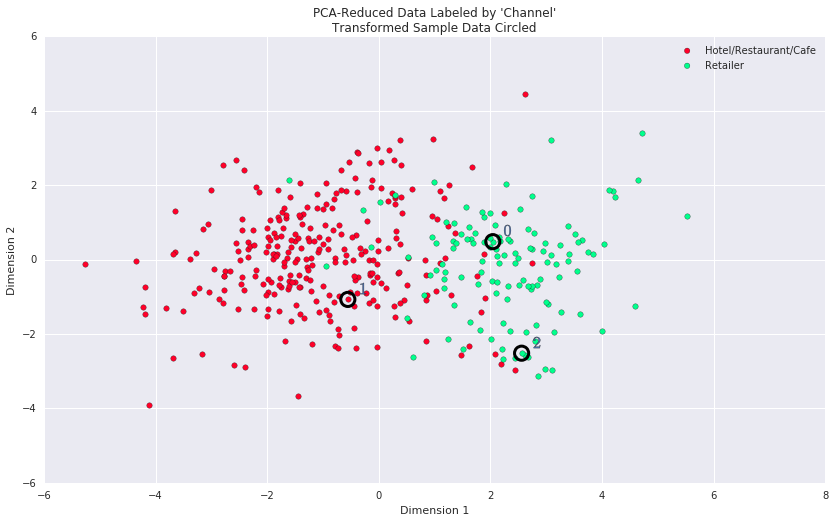

In [18]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, allout, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** The cluster allocatio of the sample points seem to be largely in track with what we had expected earlier, ecept for sample point 2
If we look at the sample point 0, we had expected it to be a retailer, and it 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.